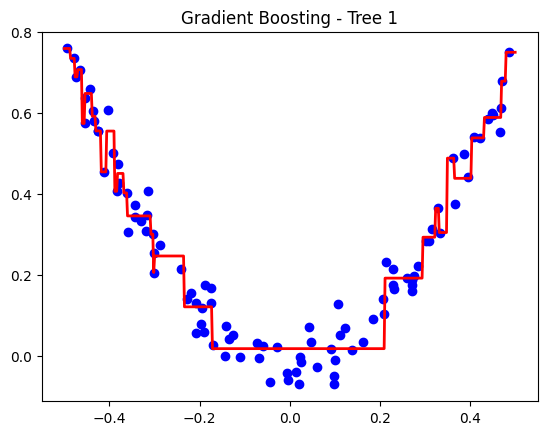

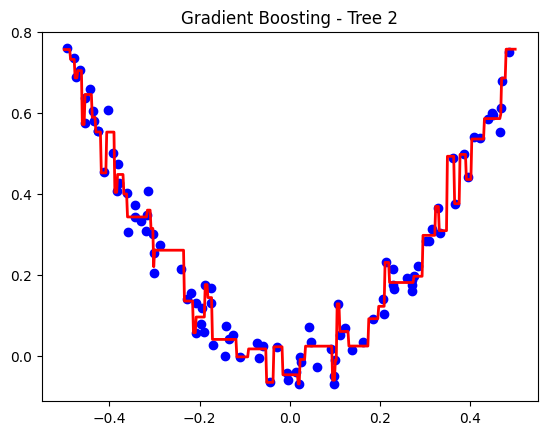

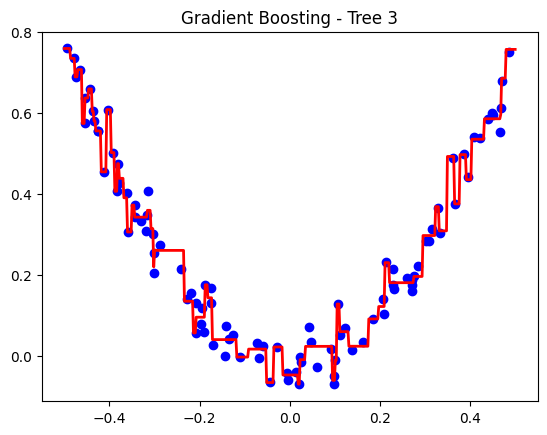

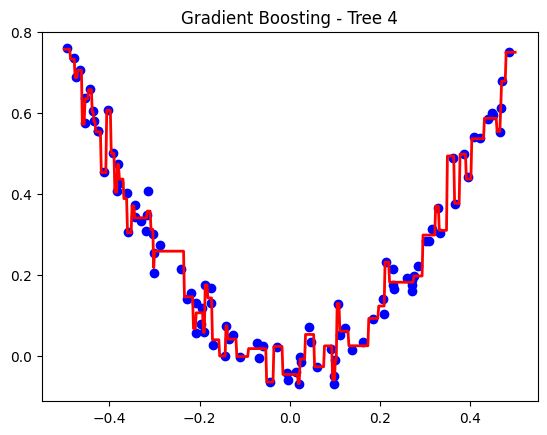

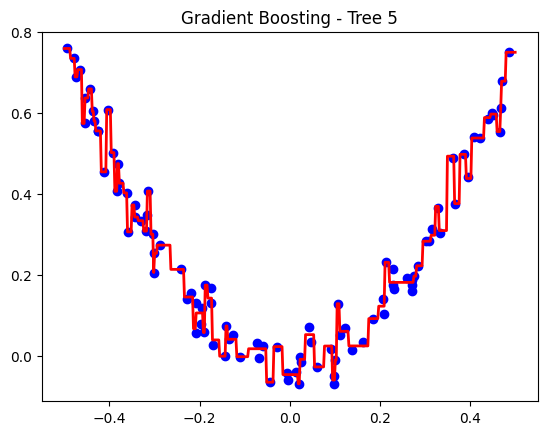

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

# Parameters
n_trees = 5
learning_rate = 1

# Initialize predictions
pred = np.zeros_like(y)
trees = []

# Gradient Boosting Loop
for i in range(n_trees):
    # Compute residuals
    residual = y - pred
    
    # Fit new tree to residuals
    tree = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree.fit(X, residual)
    trees.append(tree)
    
    # Update predictions
    pred += learning_rate * tree.predict(X)
    
    # Plot current model
    X_test = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
    y_test_pred = sum(learning_rate * t.predict(X_test) for t in trees)
    
    plt.figure()
    plt.plot(X_test, y_test_pred, 'r-', linewidth=2)
    plt.scatter(X, y, color='blue')
    plt.title(f'Gradient Boosting - Tree {i+1}')
    plt.show()

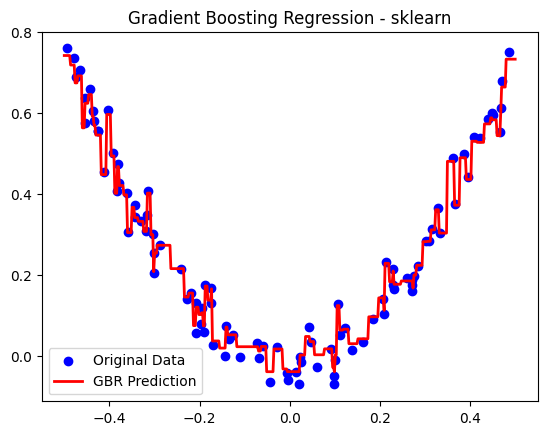

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=15,  # number of trees
                                learning_rate=0.2,  # shrinkage
                                max_depth=8,      # depth of each tree
                                random_state=42)

# Train model
gbr.fit(X, y)

# Prediction
X_test = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred = gbr.predict(X_test)

# Plot
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='GBR Prediction')
plt.title("Gradient Boosting Regression - sklearn")
plt.legend()
plt.show()


In [7]:
gbr.fit(X, y)

,loss,'squared_error'
,learning_rate,0.2
,n_estimators,15
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,8
,min_impurity_decrease,0.0
,init,None


In [8]:
gbr.score(X,y)

0.9975839069466566